In [44]:
import pandas as pd

#In this part, I specify locations of the 3 my own files
Spotifyloc = 'music_data.xlsx'

Youtubeloc = 'youtube_history_data.xlsx'

Netflixloc = 'netflix_history_data.csv'


# I converted excels to dataframe
DFY = pd.read_excel(Youtubeloc)
NFY = pd.read_csv(Netflixloc)
SPDF = pd.read_excel(Spotifyloc)

#Print the first 5 rows for each data
print("YouTube data first 5 rows:")
print(DFY.head())
print("\n")
print("Netflix data first 5 rows:")
print(NFY.head())
print("\n")
print("Spotify data first 5 rows:")
print(SPDF.head())


YouTube data first 5 rows:
  Video Title                                            Creator  \
0    adro ama  EUW Sunucusunda sıfırdan MASTER'A #8 | w/ @arr...   
1    adro ama  TR Sunucusunda sıfırdan MASTER'A #1 | w/@arrer...   
2    adro ama  TR Sunucusunda sıfırdan MASTER'A #12 | w/ @arr...   
3    adro ama  EUW Sunucusunda sıfırdan MASTER'A #11 | w/ @Pa...   
4  Konuşanlar                   Konuşanlar 23. Bölüm | Ekstralar   

                        Timestamp  
0  28 Kas 2024 18:31:46 GMT+03:00  
1  28 Kas 2024 17:55:21 GMT+03:00  
2  28 Kas 2024 17:11:18 GMT+03:00  
3  28 Kas 2024 16:04:33 GMT+03:00  
4  28 Kas 2024 15:48:38 GMT+03:00  


Netflix data first 5 rows:
  Profile Name           Start Time  Duration  \
0      Batuhan  2024-11-28 11:57:44  00:25:51   
1      Batuhan  2024-11-28 11:47:07  00:09:59   
2      Batuhan  2024-11-28 11:46:57  00:00:04   
3      Batuhan  2024-11-28 03:18:28  00:00:04   
4      Batuhan  2024-11-28 02:36:27  00:42:01   

                        

In [3]:
import re
#Normalization part with this function I lowered all texts and remove non alphabetic characters and remove extra spaces
flag = False
def normalizenow(inp):
    if isinstance(inp, str):
        inp = inp.lower()
        inp = re.sub(r'[^a-zA-ZıİşŞğĞüÜöÖçÇ\s]', '', inp)
        inp = re.sub(r'\s+', ' ', inp).strip()
        flag = True
    return inp

#Now I apply the normalization of texts
SPDF['trackName'] = SPDF['trackName'].apply(normalizenow)
SPDF['artistName'] = SPDF['artistName'].apply(normalizenow)
DFY['Video Title'] = DFY['Video Title'].apply(normalizenow)
DFY['Creator'] = DFY['Creator'].apply(normalizenow)
NFY['Title'] = NFY['Title'].apply(normalizenow)
NFY['Attributes'] = NFY['Attributes'].apply(normalizenow)
#Track normalized with error or not
flag = True

print("Normalized YouTube first 5 rows --> ")
print(DFY.head())
print("\n")
print("Normalized Netflix first 5 rows --> ")
print(NFY.head())
print("\n")
print("Normalized Spotify  first 5 rows --> ")
print(SPDF.head())


Normalized YouTube first 5 rows --> 
  Video Title                                            Creator  \
0    adro ama  euw sunucusunda sıfırdan mastera w arrer kaisa...   
1    adro ama  tr sunucusunda sıfırdan mastera warrer kaisa l...   
2    adro ama  tr sunucusunda sıfırdan mastera w arrer caitly...   
3    adro ama  euw sunucusunda sıfırdan mastera w pacelol kai...   
4  konuşanlar                         konuşanlar bölüm ekstralar   

                        Timestamp  
0  28 Kas 2024 18:31:46 GMT+03:00  
1  28 Kas 2024 17:55:21 GMT+03:00  
2  28 Kas 2024 17:11:18 GMT+03:00  
3  28 Kas 2024 16:04:33 GMT+03:00  
4  28 Kas 2024 15:48:38 GMT+03:00  


Normalized Netflix first 5 rows --> 
  Profile Name           Start Time  Duration  \
0      Batuhan  2024-11-28 11:57:44  00:25:51   
1      Batuhan  2024-11-28 11:47:07  00:09:59   
2      Batuhan  2024-11-28 11:46:57  00:00:04   
3      Batuhan  2024-11-28 03:18:28  00:00:04   
4      Batuhan  2024-11-28 02:36:27  00:42:01   

    

In [4]:
# Missing values handler
def MyFiller(MYdataframe, WH='Unknown'):
    for each in MYdataframe.columns:
        MYdataframe[each] = MYdataframe[each].fillna(WH)
        #That is filling part of missing values

    return MYdataframe

# Now call function to fill missings

NFY = MyFiller(NFY, WH='unknown')

SPDF = MyFiller(SPDF, WH='unknown track/artist')

DFY = MyFiller(DFY, WH='unknown')

print("After handling missing values, YouTube first 5 rows --> ")
print(DFY.head())
print("\n")

print("After handling missing values, Netflix first 5 rows --> ")
print(NFY.head())
print("\n")

print("After handling missing values, Spotify first 5 rows --> ")
print(SPDF.head())


After handling missing values, YouTube first 5 rows --> 
  Video Title                                            Creator  \
0    adro ama  euw sunucusunda sıfırdan mastera w arrer kaisa...   
1    adro ama  tr sunucusunda sıfırdan mastera warrer kaisa l...   
2    adro ama  tr sunucusunda sıfırdan mastera w arrer caitly...   
3    adro ama  euw sunucusunda sıfırdan mastera w pacelol kai...   
4  konuşanlar                         konuşanlar bölüm ekstralar   

                        Timestamp  
0  28 Kas 2024 18:31:46 GMT+03:00  
1  28 Kas 2024 17:55:21 GMT+03:00  
2  28 Kas 2024 17:11:18 GMT+03:00  
3  28 Kas 2024 16:04:33 GMT+03:00  
4  28 Kas 2024 15:48:38 GMT+03:00  


After handling missing values, Netflix first 5 rows --> 
  Profile Name           Start Time  Duration  \
0      Batuhan  2024-11-28 11:57:44  00:25:51   
1      Batuhan  2024-11-28 11:47:07  00:09:59   
2      Batuhan  2024-11-28 11:46:57  00:00:04   
3      Batuhan  2024-11-28 03:18:28  00:00:04   
4      Batuhan

In [5]:
def mycatfunc(df):
    df['Category'] = df['Video Title'].apply(
        lambda ec: (
            'Education' if any(eachh in ec.lower() for eachh in ['tutorial', 'how to', 'learn', 'c++','python', 'eğitim', 'ders', 'öğren', 'lecture', 'course', 'okul', 'dershane']) else
            'Gaming' if any(eachh in ec.lower() for eachh in ['game', 'play','fortnite','rainbow','league', 'stream', 'oyun', 'oyna', 'yayın', 'gamer', 'pubg', 'csgo', 'fortnite', 'valorant']) else
            'Entertainment' if any(eachh in ec.lower() for eachh in ['show','konuşanlar','güldür', 'funny', 'vlog', 'eğlence', 'komik', 'şov', 'movie', 'film', 'dizi', 'bölüm']) else
            'Technology' if any(eachh in ec.lower() for eachh in ['tech','3d', 'review', 'unbox', 'teknoloji', 'inceleme', 'kutu',"açılım", 'ai', 'robot', 'gadget']) else
            'News' if any(eachh in ec.lower() for eachh in ['news', 'report', 'update', 'haber', 'rapor', 'güncelleme', 'breaking', 'son dakika', 'manşet']) else
            'Music' if any(eachh in ec.lower() for eachh in ['music', 'song', 'live', 'müzik', 'şarkı', 'canlı', 'konser', 'album']) else
            'Sports' if any(eachh in ec.lower() for eachh in ['match', 'goal', 'sports', 'maç', 'gol', 'spor', 'basket', 'futbol', 'football', 'nba']) else
            'Kids' if any(eachh in ec.lower() for eachh in ['cartoon', 'animation', 'çizgi film', 'animasyon', 'çocuk', 'kids', 'disney', 'masal']) else
            'Cooking' if any(eachh in ec.lower() for eachh in ['recipe', 'cooking', 'tarif', 'yemek', 'pişirme', 'chef', 'mutfak', 'aşçı', 'food']) else
            'Travel' if any(eachh in ec.lower() for eachh in ['travel', 'trip', 'seyahat','dünya', 'gezi', 'tatil', 'tur', 'uçak', 'otel']) else
            'Lifestyle' if any(eachh in ec.lower() for eachh in ['lifestyle','vlog','look','press', 'life', 'hayat', 'yaşam', 'daily', 'routine', 'günlük']) else
            'Unknown'
        )
    )
    return df

#Now I categorize it with my ketwords
DFY = mycatfunc(DFY)

# Amount calculation
numof = DFY[DFY['Category'] != 'Unknown']['Category'].value_counts()
print("Categories' amount -->")
print(numof)



Categories' amount -->
Category
Entertainment    570
Education        337
Gaming           256
Travel           149
Technology       105
Music             49
Sports            34
Lifestyle         25
News              16
Kids              10
Cooking            4
Name: count, dtype: int64


In [6]:
#Now get info for 3 data
print("Youtube info -->")
print(DFY.info())
print("Netflix info -->")
print(NFY.info())
print("Spotify info -->")
print(SPDF.info())


Youtube info -->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video Title  5212 non-null   object
 1   Creator      5212 non-null   object
 2   Timestamp    5212 non-null   object
 3   Category     5212 non-null   object
dtypes: object(4)
memory usage: 163.0+ KB
None
Netflix info -->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             1079 non-null   object
 1   Start Time               1079 non-null   object
 2   Duration                 1079 non-null   object
 3   Attributes               1079 non-null   object
 4   Title                    1079 non-null   object
 5   Supplemental Video Type  1079 non-null   object
 6   Device Type              1079 n

In [7]:
#Now describe for 3 data
print("Youtube describe -->")
print(DFY.describe())
print("Netflix describe -->")
print(NFY.describe())
print("Spotify describe -->")
print(SPDF.describe())

Youtube describe -->
          Video Title                   Creator  \
count            5212                      5212   
unique           1677                      3927   
top     güldür güldür  güldür güldür show bölüm   
freq              319                       163   

                             Timestamp Category  
count                             5212     5212  
unique                            5201       12  
top     12 Kas 2024 20:01:33 GMT+03:00  Unknown  
freq                                 2     3657  
Netflix describe -->
       Profile Name           Start Time  Duration Attributes  \
count          1079                 1079      1079       1079   
unique            1                 1079       457          3   
top         Batuhan  2024-11-28 11:57:44  00:00:04    unknown   
freq           1079                    1        68        505   

                             Title Supplemental Video Type Device Type  \
count                         1079                  

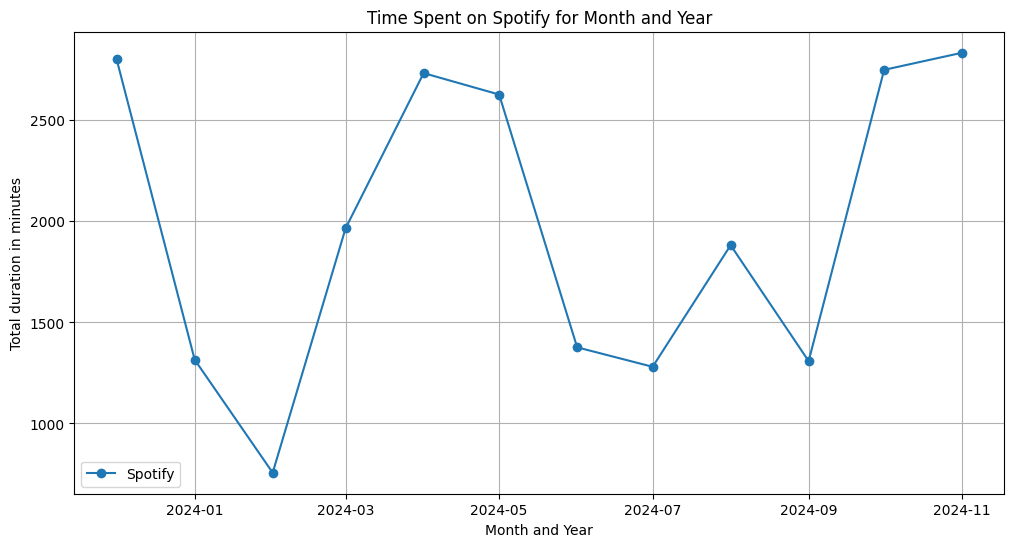

In [8]:
import matplotlib.pyplot as plt
#In this part I calculate durations for each month
def durationfunc(DF, TC, DC, DU='seconds'):
    DF[TC] = pd.to_datetime(DF[TC], errors='coerce')
    if(DU == 'milliseconds'):
        DF[DC] = DF[DC] / 1000  # to second
    DF['newone'] = DF[TC].dt.to_period('M')
    result = DF.groupby('newone')[DC].sum()
    return result

# Calculate part for monthly duration for the spotify
Duration = durationfunc(SPDF, 'endTime', 'msPlayed', DU='milliseconds')
# Make it to minute
Durmin = Duration / 60

Getrequestedmonths = pd.date_range(start='2023-11-30', end='2024-11-30', freq='MS').to_period('M')
Getrequestedmonthss = Durmin.reindex(Getrequestedmonths, fill_value=0)

# Plotting the figure
plt.figure(figsize=(12, 6))
plt.plot(Getrequestedmonthss.index.to_timestamp(), Getrequestedmonthss.values, marker='o', label='Spotify')

plt.title('Time Spent on Spotify for Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Total duration in minutes')
plt.legend()
plt.grid()
plt.show()


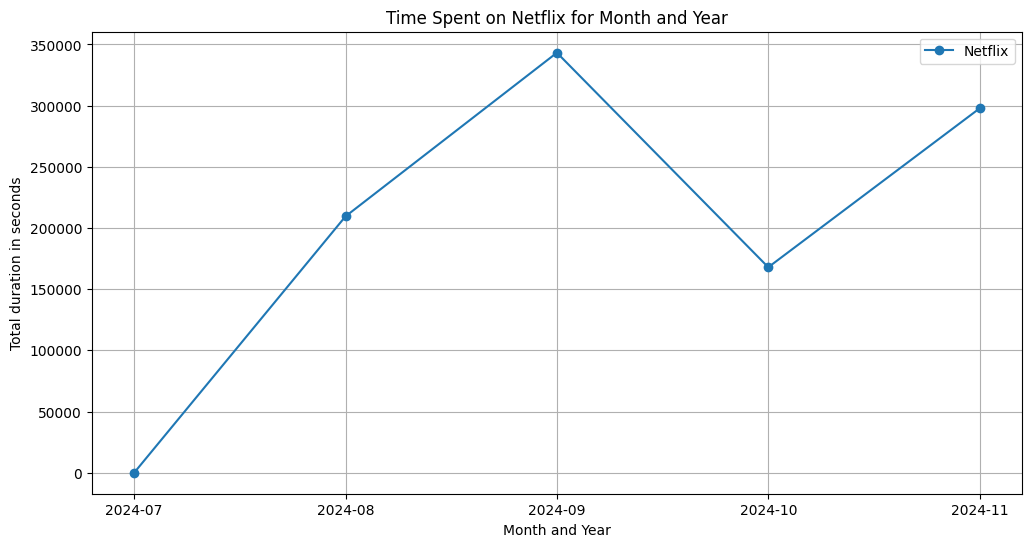

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def durationfunc(DF, TC, DC, DU='seconds'):
    DF[TC] = pd.to_datetime(DF[TC], errors='coerce')
    def secondds(inp):
        try:
            if isinstance(inp, str) and ':' in inp:
                h, m, s = map(int, inp.split(':'))
                return h * 3600 + m * 60 + s  #To seconds
            return 0
        except Exception as e:
            return 0
    DF[DC] = DF[DC].apply(secondds)

    DF['xx'] = DF[TC].dt.to_period('M')
    result = DF.groupby('xx')[DC].sum()
    return result

#Duration calculated for netflix
Dur = durationfunc(NFY, 'Start Time', 'Duration', DU='hh:mm:ss')

#Define time range
Myrange = pd.date_range(start='2024-07-01', end='2024-11-30', freq='MS').strftime('%Y-%m')
DurN = Dur.reindex(Myrange, fill_value=0)
#Plotting part
plt.figure(figsize=(12, 6))
plt.plot(DurN.index, DurN.values, marker='o', label='Netflix')

plt.title('Time Spent on Netflix for Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Total duration in seconds')
plt.legend()
plt.grid()
plt.show()


<ipython-input-10-194169572842>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DF[TC] = pd.to_datetime(DF[TC], errors='coerce')


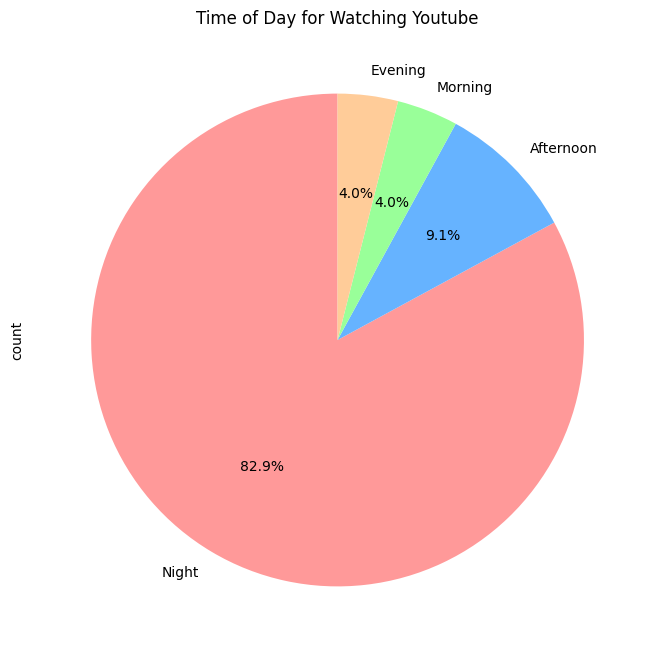

In [10]:

#Categorizing to time of data
def Categorization(DF, TC):
    DF[TC] = pd.to_datetime(DF[TC], errors='coerce')

    #Splitting to times
    def timecalculator(inpp):
        if(6 <= inpp < 12):
            return 'Morning'
        elif(12 <= inpp < 18):
            return 'Afternoon'
        elif(18 <= inpp < 21):
            return 'Evening'
        else:
            return 'Night'
    DF['Daycalculated'] = DF[TC].dt.hour.apply(timecalculator)
    return DF


DFY = Categorization(DFY, 'Timestamp')
#Period of day calculation
Counted = DFY['Daycalculated'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
Counted.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Time of Day for Watching Youtube')
plt.show()


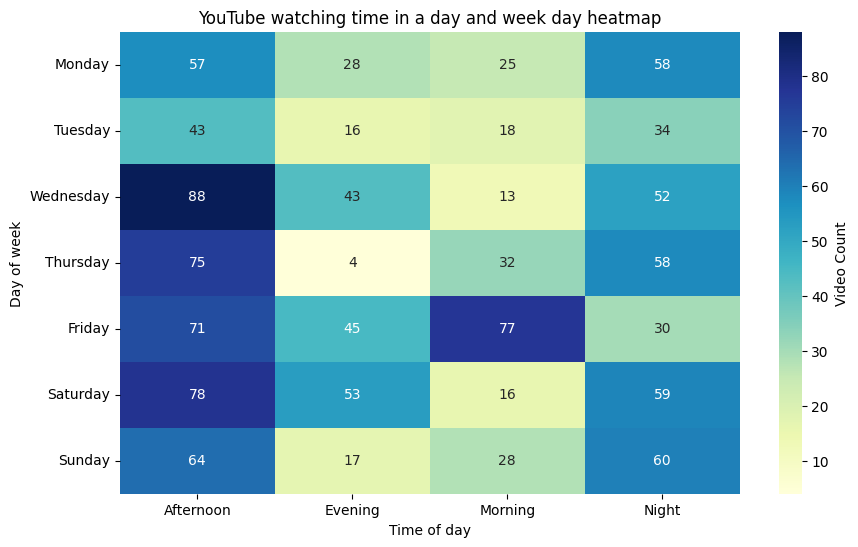

In [11]:
import seaborn as sns


#Categorizing to time and day of data
def Categorization(DF, TC):
    DF[TC] = pd.to_datetime(DF[TC], errors='coerce')

    #Splitting to times
    def timecalculator(inpp):
        if(6 <= inpp < 12):
            return 'Morning'
        elif(12 <= inpp < 18):
            return 'Afternoon'
        elif(18 <= inpp < 21):
            return 'Evening'
        else:
            return 'Night'
    DF['Daycalculated'] = DF[TC].dt.hour.apply(timecalculator)
    DF['DayIn'] = DF[TC].dt.day_name()
    return DF

DFY = Categorization(DFY, 'Timestamp')

# Now create table data
HP = pd.crosstab(DFY['DayIn'], DFY['Daycalculated'], values=DFY['Video Title'], aggfunc='count', normalize=False)


Weekdayssorting = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap_data = HP.reindex(Weekdayssorting)

# heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Video Count'})
plt.title('YouTube watching time in a day and week day heatmap')
plt.xlabel('Time of day')
plt.ylabel('Day of week')
plt.show()


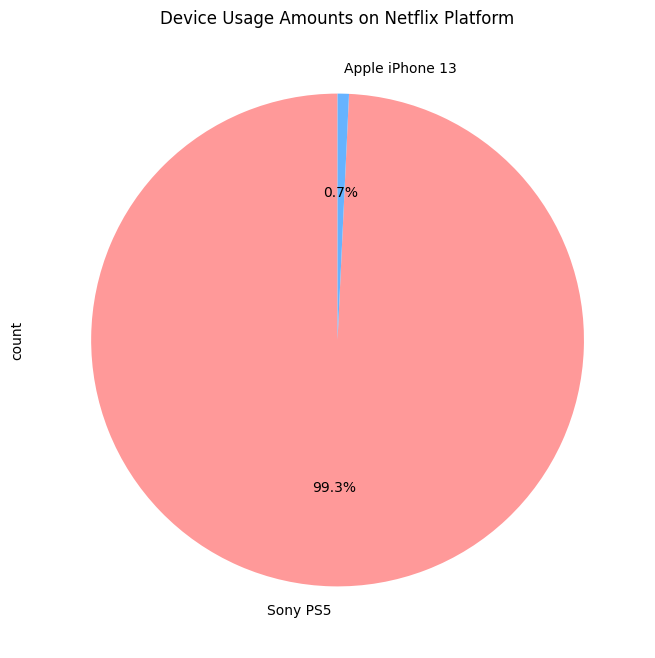

In [12]:
#Device calculation
def DeviceChart(Data, Devices):
    accumulated = Data[Devices].value_counts()
    # Ploting chart now
    plt.figure(figsize=(8, 8))
    accumulated.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])
    plt.title('Device Usage Amounts on Netflix Platform')
    plt.show()

DeviceChart(NFY, 'Device Type')


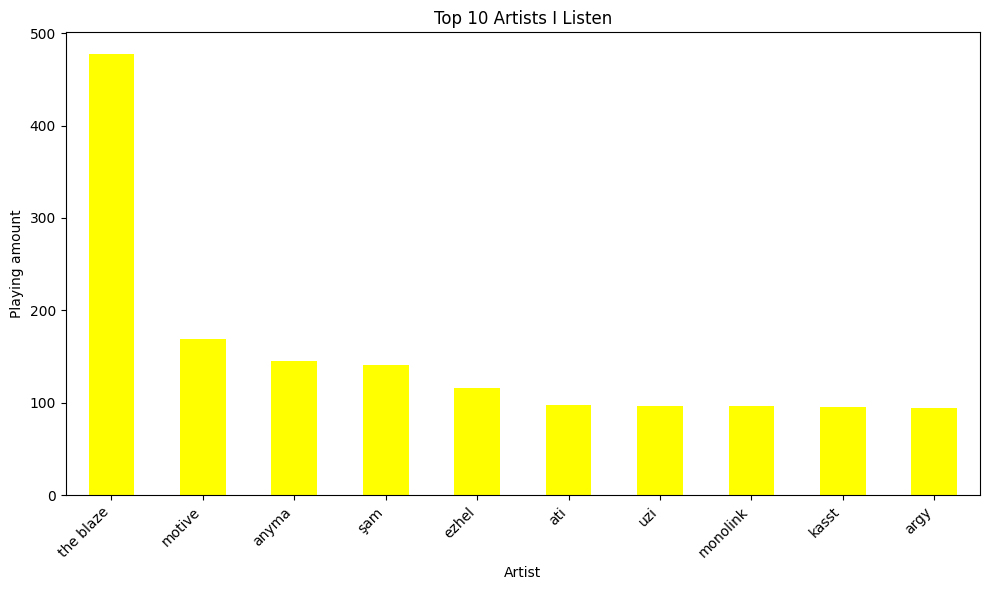

In [18]:
#Histogram function
def Functionforbestauthors(df, sanatci, Besti=10):
    # Get 10 artists
    Got = df[sanatci].value_counts().head(Besti)

    #Plot part
    plt.figure(figsize=(10, 6))
    Got.plot(kind='bar', color='yellow')
    plt.title(f'Top 10 Artists I Listen')
    plt.xlabel('Artist')

    plt.ylabel('Playing amount')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

Functionforbestauthors(SPDF, 'artistName', Besti=10)


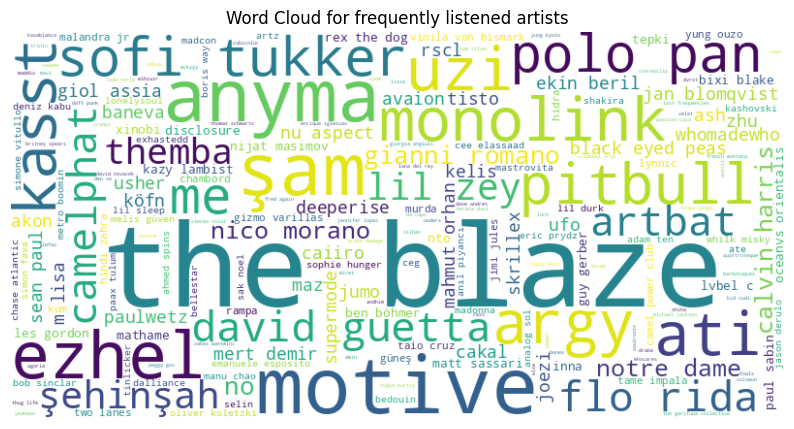

In [21]:

from wordcloud import WordCloud

def Wordfunc(df, AA):
    num = df[AA].value_counts()

    Dictionarynum = num.to_dict()

    #In here I generated word cloud
    currentwords = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Dictionarynum)

    #Plotting that words
    plt.figure(figsize=(10, 6))
    plt.imshow(currentwords, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for frequently listened artists')
    plt.show()

Wordfunc(SPDF, 'artistName')


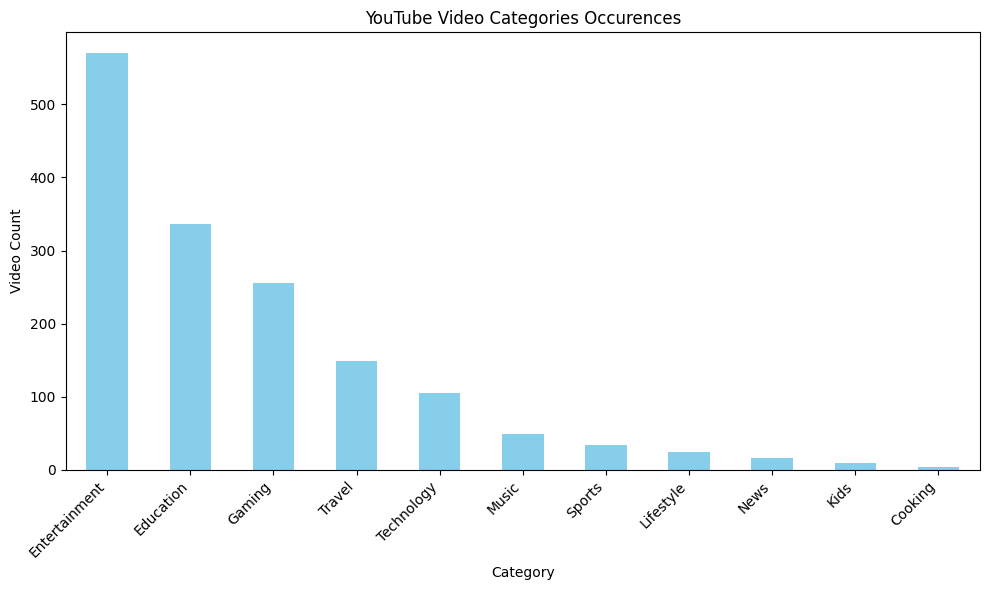

In [24]:
def Plottingcategories(df, cats):
    #Remove Unknown categories
    cleanedvers = df[df[cats] != 'Unknown']
    numberofcats = cleanedvers[cats].value_counts()

    #Histogram plotting
    plt.figure(figsize=(10, 6))
    numberofcats.plot(kind='bar', color='skyblue')

    plt.title('YouTube Video Categories Occurences')
    plt.xlabel('Category')

    plt.ylabel('Video Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Plottingcategories(DFY, 'Category')


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Make data more convienent to modelling
def Extractfeatures(df):
    df['endTime'] = pd.to_datetime(df['endTime'], errors='coerce')
    df['hour'] = df['endTime'].dt.hour
    df['dayofweek'] = df['endTime'].dt.dayofweek
    df['month'] = df['endTime'].dt.month
    # Missing data fill part
    df.fillna(0, inplace=True)
    return df

SPDF = Extractfeatures(SPDF)

#features and target data
Xvaluespotify = SPDF[['hour', 'dayofweek', 'month']]
Yvaluespotify = SPDF['msPlayed']

#train and test split
Xtrainspotify, Xtest, ytrain, ytest = train_test_split(Xvaluespotify, Yvaluespotify, test_size=0.2, random_state=42)

#Applly Random Forest model
Modelcurrent = RandomForestRegressor(n_estimators=100, random_state=42)
Modelcurrent.fit(Xtrainspotify, ytrain)

#Predictions
YPRED = Modelcurrent.predict(Xtest)

# RMSE, MAE values calculation
RMSE = np.sqrt(mean_squared_error(ytest, YPRED))

MAE = mean_absolute_error(ytest, YPRED)

print(f"RMSE --> {RMSE}")
print(f"MAE --> {MAE}")


RMSE --> 104.82548840432061
MAE --> 80.3774244695744


In [40]:
Dataforpredictionexample = pd.DataFrame({'hour': [12, 15, 18, 20, 9, 22],'dayofweek': [0, 1, 2, 3, 4, 5],'month': [5, 6, 7, 8, 9, 10]})

#Predicting future playtime
Predictedval = Modelcurrent.predict(Dataforpredictionexample)

# İllustrate estimated future playtime in milliseconds
print(f"Estimated future Spotify playtime in ms --> {Predictedval}")

Estimated future Spotify playtime in ms --> [226.6370462  102.64756459 112.80867614 138.37045639 136.35950062
 239.21586311]


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
from sklearn.preprocessing import LabelEncoder
#Make data more convienent to modelling
def Extractfeatures(df):
    df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
    df['hour'] = df['Start Time'].dt.hour
    df['dayofweek'] = df['Start Time'].dt.dayofweek
    df['month'] = df['Start Time'].dt.month
    df['session_length'] = pd.to_timedelta(df['Duration']).dt.total_seconds()
    Deviceholder = LabelEncoder()
    df['Device Type'] = Deviceholder.fit_transform(df['Device Type'])

    Titleshandler = LabelEncoder()
    df['Title'] = Titleshandler.fit_transform(df['Title'])

    #Handling the missing cells
    df.fillna(0, inplace=True)

    return df

NFY = Extractfeatures(NFY)

# Features and target value
XN = NFY[['hour', 'dayofweek', 'month', 'Device Type', 'session_length']]
YN = NFY['Duration']

# Define Train test splitting
xtrainn, xtestt, YT, YTST = train_test_split(XN, YN, test_size=0.2, random_state=42)

# Train the HistGradientBoosting model
HistGradientBoostingMODEL = HistGradientBoostingRegressor(random_state=42)
HistGradientBoostingMODEL.fit(xtrainn, YT)

#Predictions
YPREDICTED = HistGradientBoostingMODEL.predict(xtestt)

# RMSE and MAE
RMSE1 = np.sqrt(mean_squared_error(YTST, YPREDICTED))
MAE1 = mean_absolute_error(YTST, YPREDICTED)

print(f"HistGradientBoosting Model RMSE --> {RMSE1}")
print(f"HistGradientBoosting Model MAE --> {MAE1}")

# Hyperparameter tuning GridSearchCV
gridhypers = {
    'max_iter': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [20, 50],
}

#GridSearchCV Part
Gridsearchmod = GridSearchCV(estimator=HistGradientBoostingMODEL, param_grid=gridhypers, cv=3, n_jobs=-1, verbose=2)
Gridsearchmod.fit(xtrainn, YT)

# Best parameters from GridSearch
print(f"Best Parameters for HistGradientBoosting Model --> {Gridsearchmod.best_params_}")

# Using the best model in order to predictions
Best = Gridsearchmod.best_estimator_
TunedY = Best.predict(xtestt)

# Tuned
RMSETUNED = np.sqrt(mean_squared_error(YTST, TunedY))
MAETUNED = mean_absolute_error(YTST, TunedY)

print(f"Tuned HistGradientBoosting Model RMSE --> {RMSETUNED}")
print(f"Tuned HistGradientBoosting Model MAE --> {MAETUNED}")


HistGradientBoosting Model RMSE --> 166.20881202169463
HistGradientBoosting Model MAE --> 44.10669012971589
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for HistGradientBoosting Model --> {'learning_rate': 0.05, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 20}
Tuned HistGradientBoosting Model RMSE --> 166.90115110154503
Tuned HistGradientBoosting Model MAE --> 44.76974031266737


In [43]:
#Predict with data part
future_data = pd.DataFrame({'hour': [12, 15, 18, 20, 9, 22],'dayofweek': [1, 2, 3, 4, 5, 6],'month': [6, 7, 8, 9, 10, 11],'Device Type': [1, 1, 2, 2, 3, 3],'session_length': [1200, 1500, 1800, 2000, 1000, 1300]
})

# Make future predictions
Futurepredictionofmydata = Best.predict(future_data)

#estimeting for 6 next months
print("Estimated next future Netflix usage time in seconds -->")
print(Futurepredictionofmydata)

Estimated next future Netflix usage time in seconds -->
[7125.69106264 7125.69106264 7125.69106264 7125.69106264 7125.69106264
 7125.69106264]
